## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [2]:
data = pd.read_csv("data/kaggle_survey_2020_responses.csv")
data

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


## 데이터 전처리
- 교육상태와 관련이 있는 column들을 고른다.
- datascience 실무 경력과 관련된 column을 고른다.

In [3]:
# edu_column
edu_column = ["Q4", "Q6", "Q15"]
ds_column = ["Q5", "Q20", "Q22"]
y = ["Q24"]

edit_data = data[edu_column + ds_column + y]
edit_data

,Q4,Q6,Q15,Q5,Q20,Q22,Q24
0,What is the highest level of formal education ...,For how many years have you been writing code ...,For how many years have you used machine learn...,Select the title most similar to your current ...,What is the size of the company where you are ...,Does your current employer incorporate machine...,What is your current yearly compensation (appr...
1,Doctoral degree,5-10 years,1-2 years,Student,NaN,NaN,NaN
2,Master’s degree,5-10 years,1-2 years,Data Engineer,"10,000 or more employees","We have well established ML methods (i.e., mod...","100,000-124,999"
3,Bachelor’s degree,10-20 years,I do not use machine learning methods,Software Engineer,"1000-9,999 employees",No (we do not use ML methods),"15,000-19,999"
4,Master’s degree,5-10 years,3-4 years,Data Scientist,250-999 employees,"We have well established ML methods (i.e., mod...","125,000-149,999"
...,...,...,...,...,...,...,...
20032,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN
20033,Master’s degree,20+ years,1-2 years,Currently not employed,NaN,NaN,NaN
20034,Master’s degree,< 1 years,I do not use machine learning methods,Research Scientist,0-49 employees,We are exploring ML methods (and may one day p...,$0-999
20035,Bachelor’s degree,3-5 years,1-2 years,Software Engineer,"10,000 or more employees","We recently started using ML methods (i.e., mo...",$0-999


In [4]:
# null이 아닌 row만
edit_data.isnull()

,Q4,Q6,Q15,Q5,Q20,Q22,Q24
0,False,False,False,False,False,False,False
1,False,False,False,False,True,True,True
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
20032,False,True,True,True,True,True,True
20033,False,False,False,False,True,True,True
20034,False,False,False,False,False,False,False
20035,False,False,False,False,False,False,False


In [5]:
edit_data[edit_data.isnull().any(axis=1)]

,Q4,Q6,Q15,Q5,Q20,Q22,Q24
1,Doctoral degree,5-10 years,1-2 years,Student,NaN,NaN,NaN
5,Master’s degree,3-5 years,NaN,Software Engineer,NaN,NaN,NaN
6,Bachelor’s degree,< 1 years,NaN,Data Analyst,NaN,NaN,NaN
7,Bachelor’s degree,3-5 years,Under 1 year,Student,NaN,NaN,NaN
8,Master’s degree,< 1 years,1-2 years,Student,NaN,NaN,NaN
...,...,...,...,...,...,...,...
20028,Master’s degree,3-5 years,I do not use machine learning methods,Student,NaN,NaN,NaN
20029,Master’s degree,< 1 years,I do not use machine learning methods,Data Analyst,0-49 employees,NaN,NaN
20031,Master’s degree,NaN,NaN,NaN,NaN,NaN,NaN
20032,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# 결측치를 제거한다
final_data = edit_data.dropna()
final_data

,Q4,Q6,Q15,Q5,Q20,Q22,Q24
0,What is the highest level of formal education ...,For how many years have you been writing code ...,For how many years have you used machine learn...,Select the title most similar to your current ...,What is the size of the company where you are ...,Does your current employer incorporate machine...,What is your current yearly compensation (appr...
2,Master’s degree,5-10 years,1-2 years,Data Engineer,"10,000 or more employees","We have well established ML methods (i.e., mod...","100,000-124,999"
3,Bachelor’s degree,10-20 years,I do not use machine learning methods,Software Engineer,"1000-9,999 employees",No (we do not use ML methods),"15,000-19,999"
4,Master’s degree,5-10 years,3-4 years,Data Scientist,250-999 employees,"We have well established ML methods (i.e., mod...","125,000-149,999"
9,Doctoral degree,5-10 years,2-3 years,Data Scientist,"1000-9,999 employees","We have well established ML methods (i.e., mod...","70,000-79,999"
...,...,...,...,...,...,...,...
20025,I prefer not to answer,1-2 years,1-2 years,Machine Learning Engineer,0-49 employees,I do not know,"2,000-2,999"
20030,Bachelor’s degree,10-20 years,I do not use machine learning methods,Other,250-999 employees,No (we do not use ML methods),"15,000-19,999"
20034,Master’s degree,< 1 years,I do not use machine learning methods,Research Scientist,0-49 employees,We are exploring ML methods (and may one day p...,$0-999
20035,Bachelor’s degree,3-5 years,1-2 years,Software Engineer,"10,000 or more employees","We recently started using ML methods (i.e., mo...",$0-999


## 교육수준과 관련된 EDA

In [7]:
Q4 = final_data["Q4"]

In [8]:
Q4

0        What is the highest level of formal education ...
2                                          Master’s degree
3                                        Bachelor’s degree
4                                          Master’s degree
9                                          Doctoral degree
                               ...                        
20025                               I prefer not to answer
20030                                    Bachelor’s degree
20034                                      Master’s degree
20035                                    Bachelor’s degree
20036                                      Master’s degree
Name: Q4, Length: 10169, dtype: object

(array([1.000e+00, 4.662e+03, 2.836e+03, 0.000e+00, 1.666e+03, 3.460e+02,
        0.000e+00, 4.240e+02, 1.400e+02, 9.400e+01]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

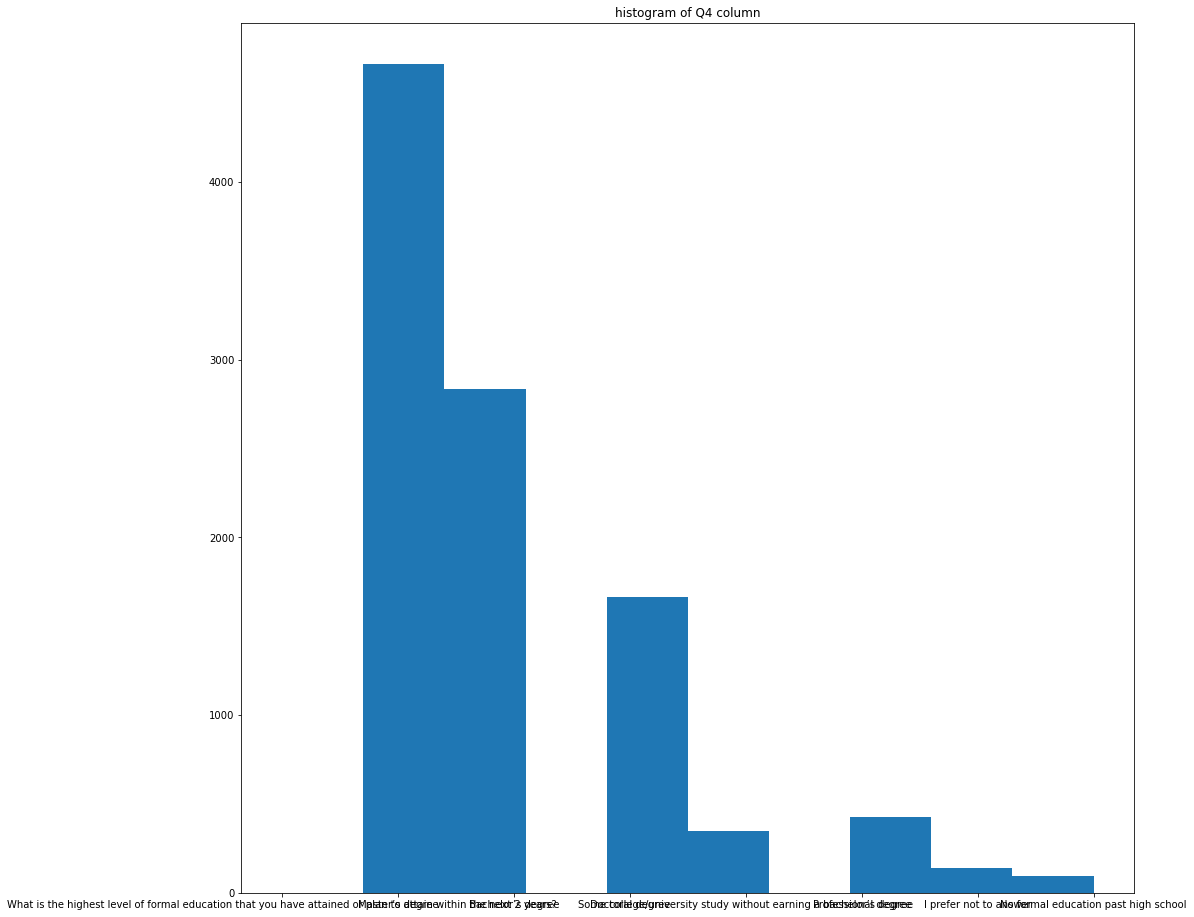

In [9]:
plt.figure(figsize=(16,16))
plt.title("histogram of Q4 column")
plt.hist(Q4)

(-1.1247511138952724,
 1.1122268099749066,
 -1.110699148363486,
 1.100509483264692)

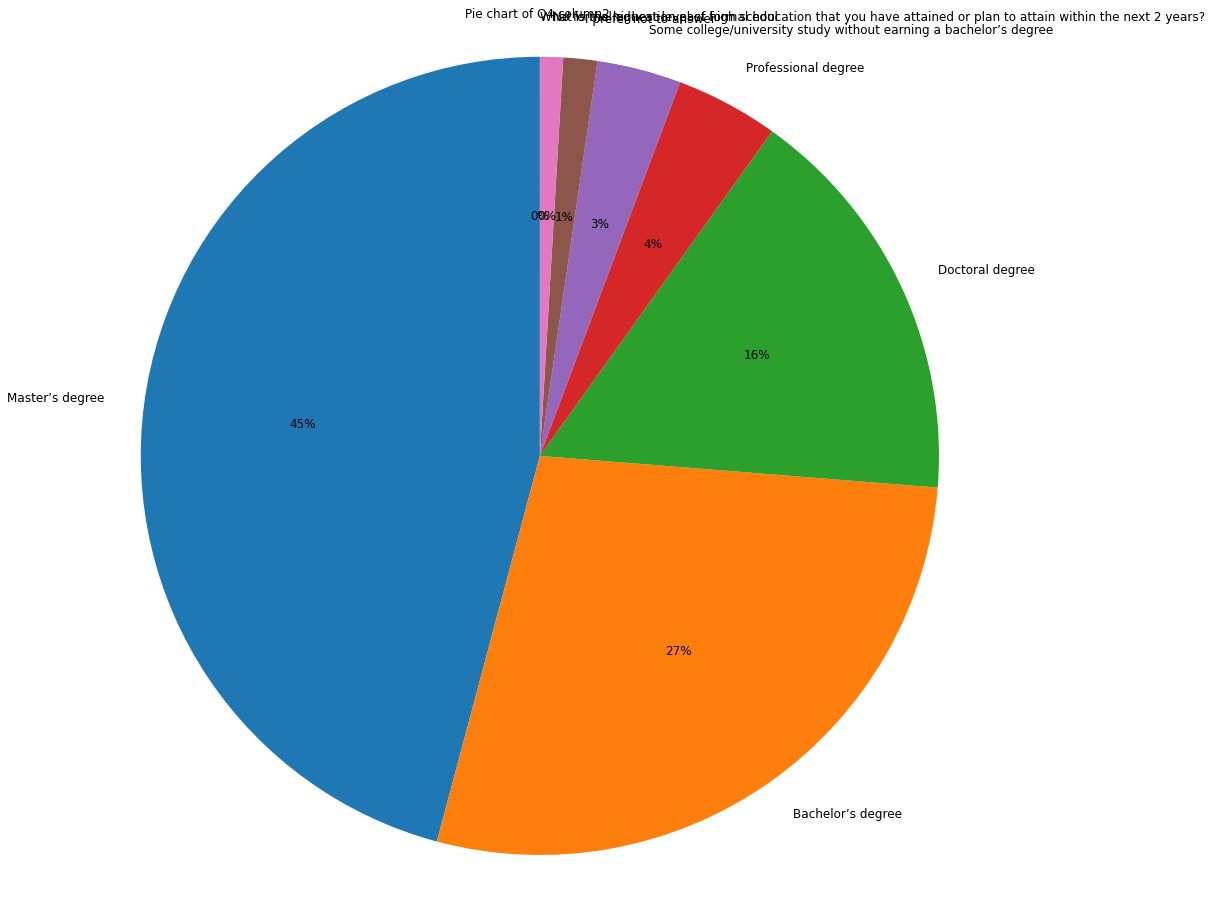

In [11]:
plt.figure(figsize=(16, 16))
plt.title("Pie chart of Q4 column2")
plt.pie(Q4.value_counts(),
       labels=Q4.value_counts().index,
       autopct='%d%%',
       startangle=90,
       textprops={'fontsize':12})
plt.axis('equal')

In [12]:
Q6 = final_data["Q6"][1:]

In [13]:
Q6.value_counts()

3-5 years      2444
1-2 years      1908
5-10 years     1901
10-20 years    1488
< 1 years      1281
20+ years      1146
Name: Q6, dtype: int64

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

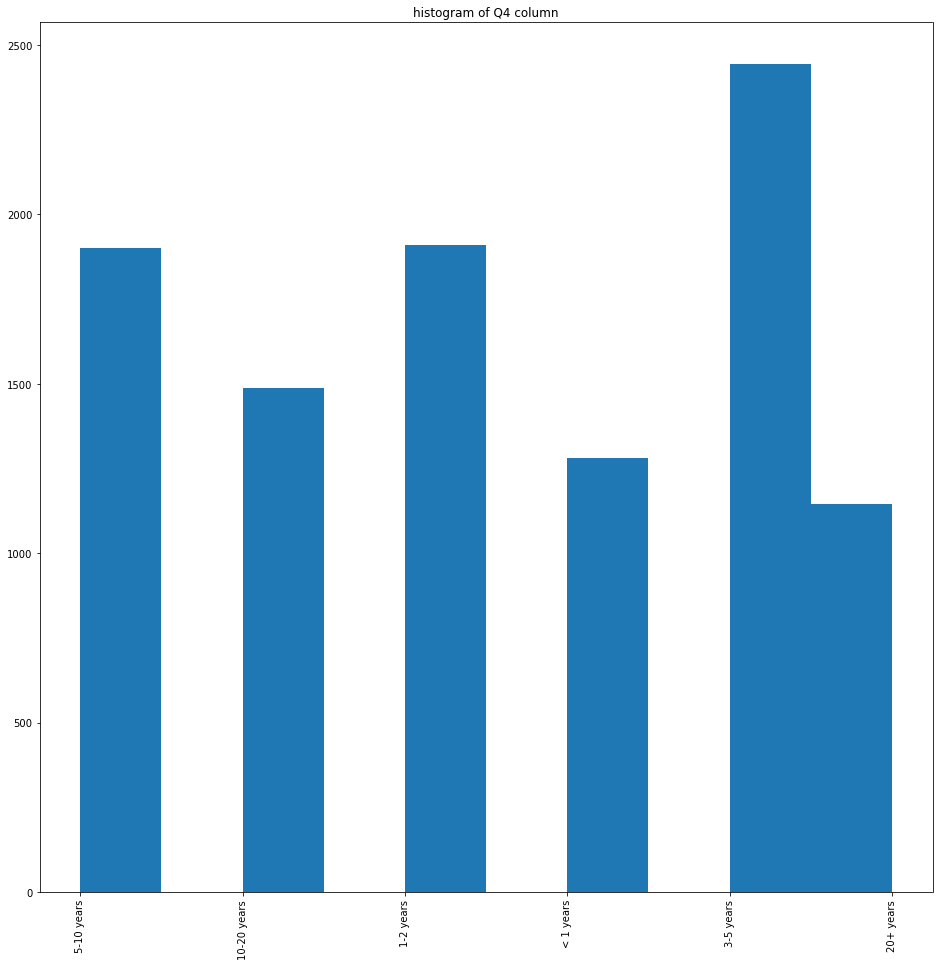

In [14]:
plt.figure(figsize=(16,16))
plt.title("histogram of Q4 column")
plt.hist(Q6)
plt.xticks(rotation="vertical") # 뒤집어져서 나옴

Text(0.5, 1.0, 'Pie chart for Q6 column')

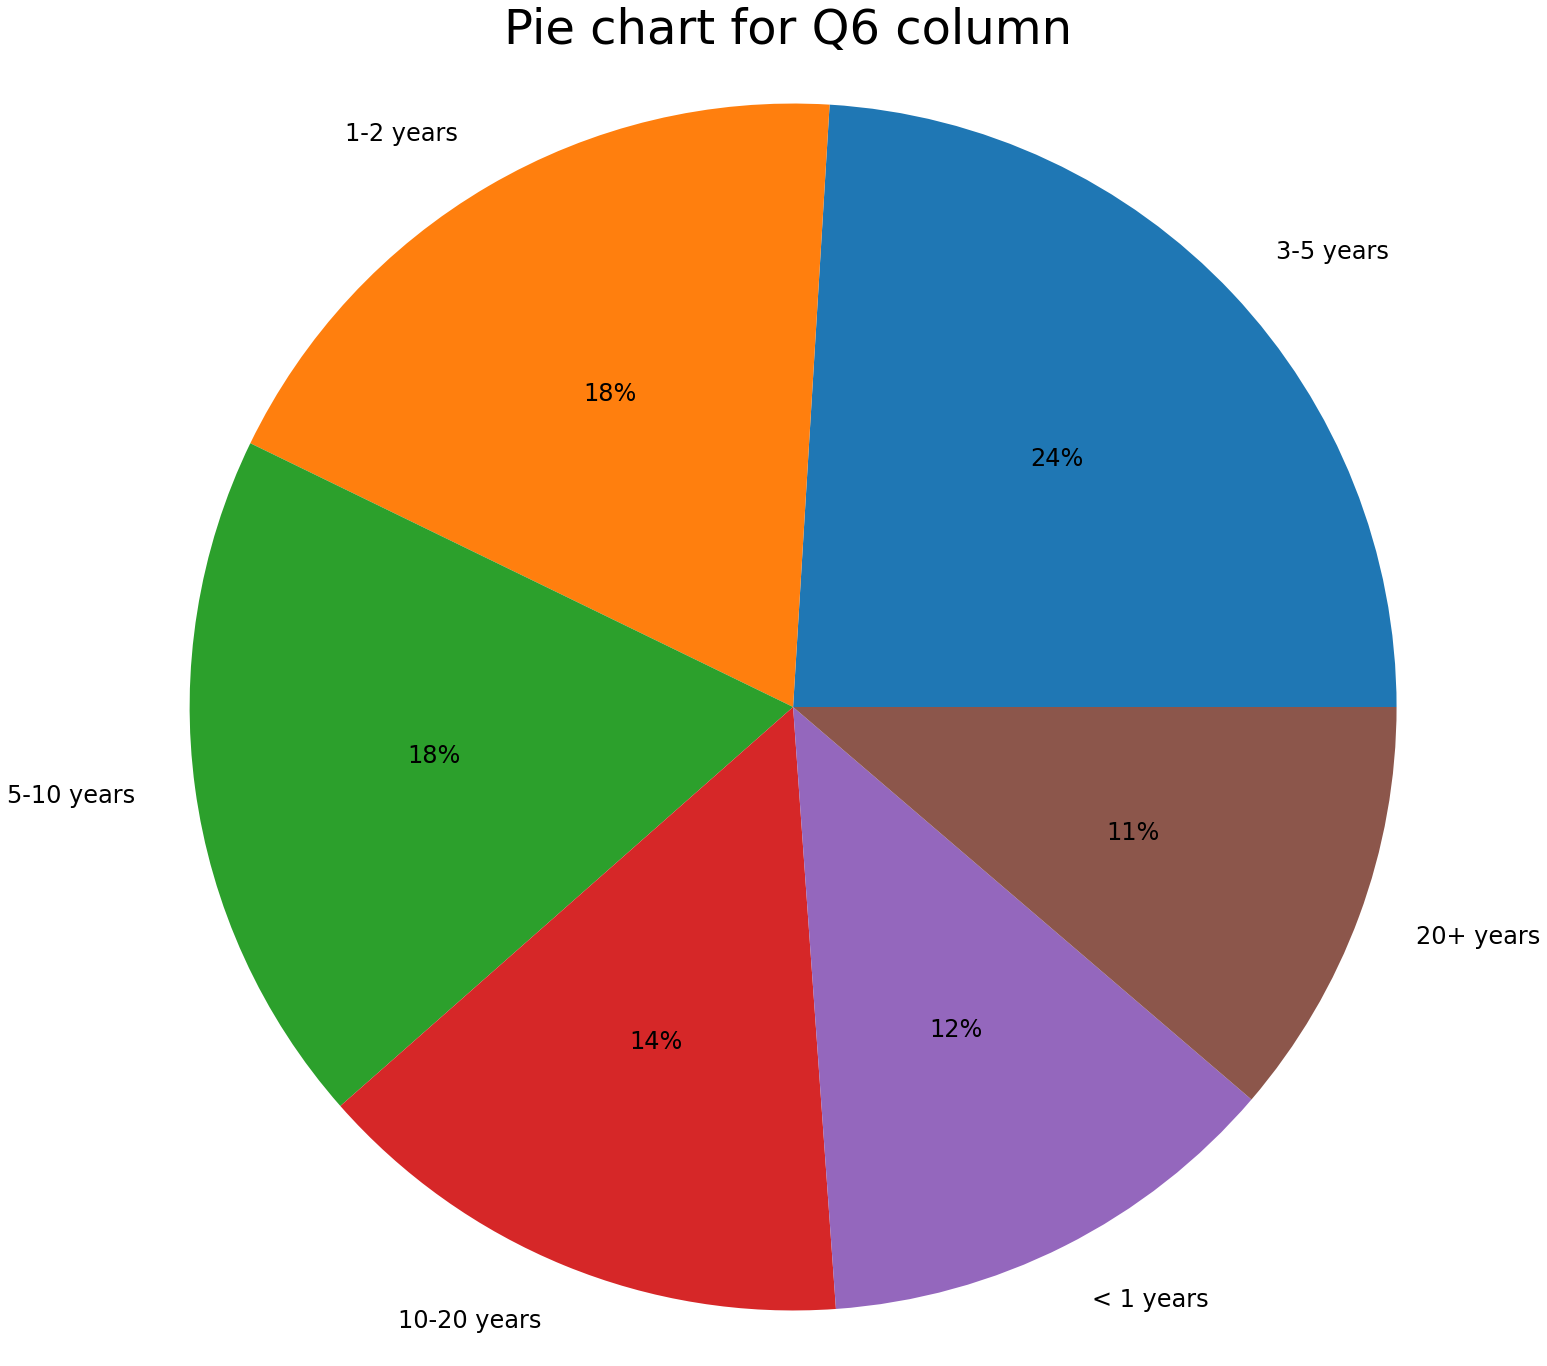

In [16]:
plt.figure(figsize=(24,24))
plt.pie(Q6.value_counts(),
       labels=Q6.value_counts().index,
       autopct='%d%%',
       textprops={'fontsize':24})
plt.axis('equal')
plt.title("Pie chart for Q6 column", fontsize=48)